In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [3]:
#plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.dpi'] = 200

In [4]:
directory = './aib9_openmm/'
phi_df = pd.read_csv(directory + 'COLVAR_phi', skiprows = 19, delim_whitespace = True, header = None)
psi_df = pd.read_csv(directory + 'COLVAR_psi', skiprows = 19, delim_whitespace = True, header = None)

/tmp/ipykernel_753559/1567560184.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  phi_df = pd.read_csv(directory + 'COLVAR_phi', skiprows = 19, delim_whitespace = True, header = None)
/tmp/ipykernel_753559/1567560184.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  psi_df = pd.read_csv(directory + 'COLVAR_psi', skiprows = 19, delim_whitespace = True, header = None)


In [130]:
def phi_psi(residue, phi_df, psi_df):
    phi_arr = phi_df[[residue]].to_numpy()
    psi_arr = psi_df[[residue]].to_numpy()
    output = np.array([phi_arr, psi_arr]).T
    output = output.squeeze()
    return output

In [132]:
data_limiter = 100000

data = phi_psi(1, phi_df, psi_df)
for i in np.arange(2, 10):
    arr_add = phi_psi(i, phi_df, psi_df)
    data = np.hstack((data, arr_add))
num_rows = data.shape[0]
row_indices = np.random.permutation(num_rows)
shuffled_data = data[row_indices]
final_data = shuffled_data[:data_limiter]

In [133]:
save_destination = f"data_input/aib9_total_0"
print(save_destination)
np.save(save_destination, final_data)

data_input/aib9_total_0


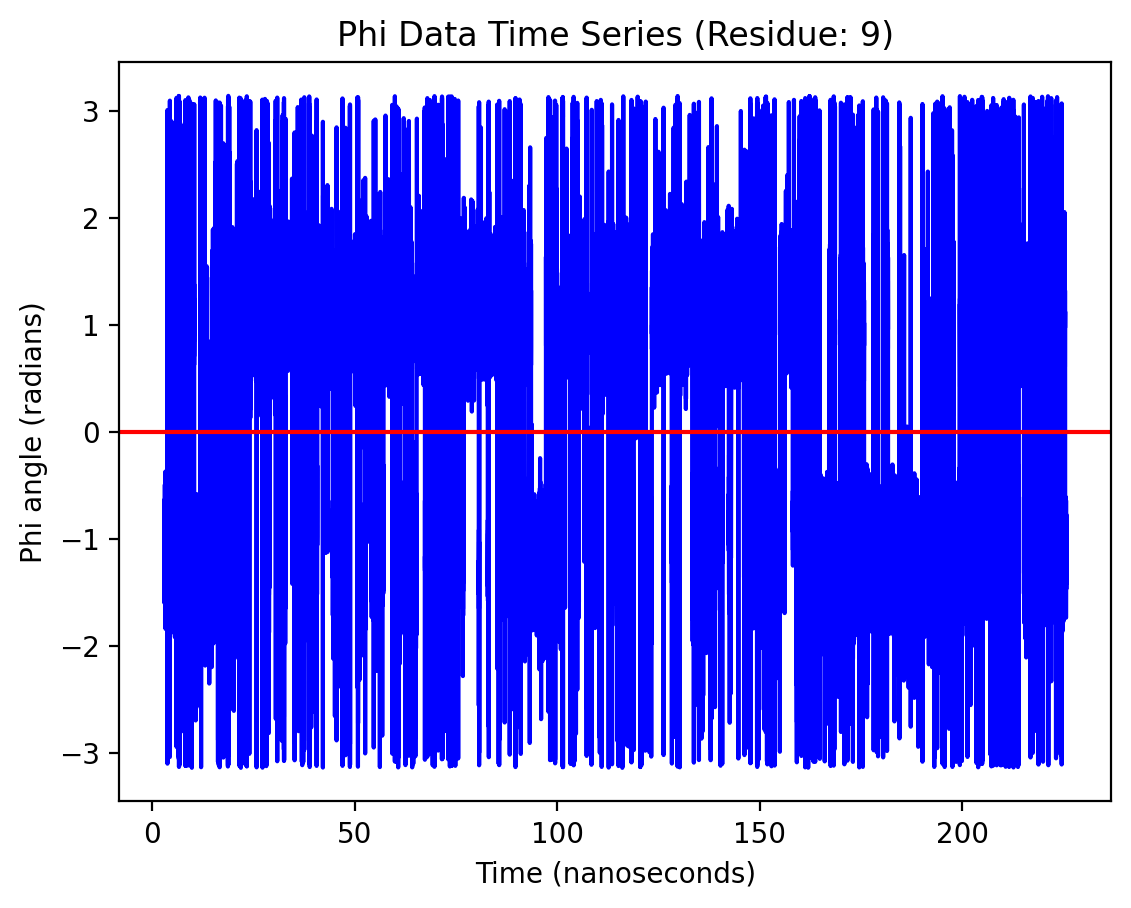

In [134]:
# convert picoseconds to nanoseconds by dividing by 1000

time_series = phi_df[[0]].to_numpy()/1000
time_series = time_series.squeeze()[::coarsegrain]
phi_series = aib9_data[:,0]

plt.plot(time_series[:], phi_series[:], color='blue')

plt.xlabel('Time (nanoseconds)')
plt.ylabel('Phi angle (radians)')
plt.title(f"Phi Data Time Series (Residue: {residue})")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.show()